**Minor Project 3: Monthly Expense and
Spending Pattern Analysis**

**Problem Statement :**

Individuals often track expenses but struggle to understand spending patterns and control unnecessary
costs.
 This project focuses on analyzing personal expense data to identify trends and spending behavior.

In [4]:
#import pandas, matplot and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# read the file
df = pd.read_csv('/content/4870114-SuperMarket_Analysis.csv')
print(df)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428   Alex     Yangon        Member  Female   
1    226-31-3081   Giza  Naypyitaw        Normal  Female   
2    631-41-3108   Alex     Yangon        Normal  Female   
3    123-19-1176   Alex     Yangon        Member  Female   
4    373-73-7910   Alex     Yangon        Member  Female   
..           ...    ...        ...           ...     ...   
995  233-67-5758   Giza  Naypyitaw        Normal    Male   
996  303-96-2227  Cairo   Mandalay        Normal  Female   
997  727-02-1313   Alex     Yangon        Member    Male   
998  347-56-2442   Alex     Yangon        Normal    Male   
999  849-09-3807   Alex     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Sales  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

In [6]:
print(df.head())
print(df.info())
print(df.describe())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.761905       26.1415   
1  10:29

In [7]:
print(df.isnull().sum())
df = df.fillna(0)

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


- Clean and Preprocess the dataset

In [15]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract useful time features for analysis
df['Month'] = df['Date'].dt.month_name()
df['Month_Num'] = df['Date'].dt.month # Used for sorting
df['Day_Name'] = df['Date'].dt.day_name()



- analyze total and average expense

In [16]:
total_sales = df['Sales'].sum()
avg_sales = df['Sales'].mean()
print(f"\nTotal Spending: {total_sales:}")
print(f"Average Transaction Value: {avg_sales:}")


Total Spending: 322966.749
Average Transaction Value: 322.966749


- Grouping by category

In [17]:

category_spending = df.groupby('Product line')['Sales'].sum()
category_spending

,Sales
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


**Visualization(matplotlib and seaborn)**
 - Bar plots for expense trends

/tmp/ipython-input-991194293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_spending.reset_index(), x='Sales', y='Product line', palette='viridis')


Text(0.5, 1.0, 'High-Spending Categories (Total Sales)')

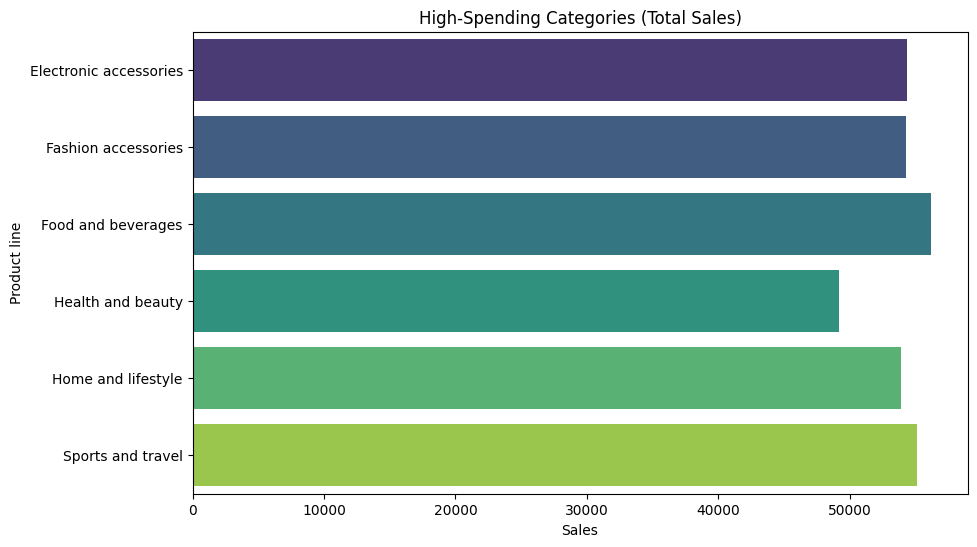

In [18]:

plt.figure(figsize=(10, 6))
sns.barplot(data=category_spending.reset_index(), x='Sales', y='Product line', palette='viridis')
plt.title('High-Spending Categories (Total Sales)')



 -  Line plots for expense trends

Text(0.5, 1.0, 'Monthly Expense Trend')

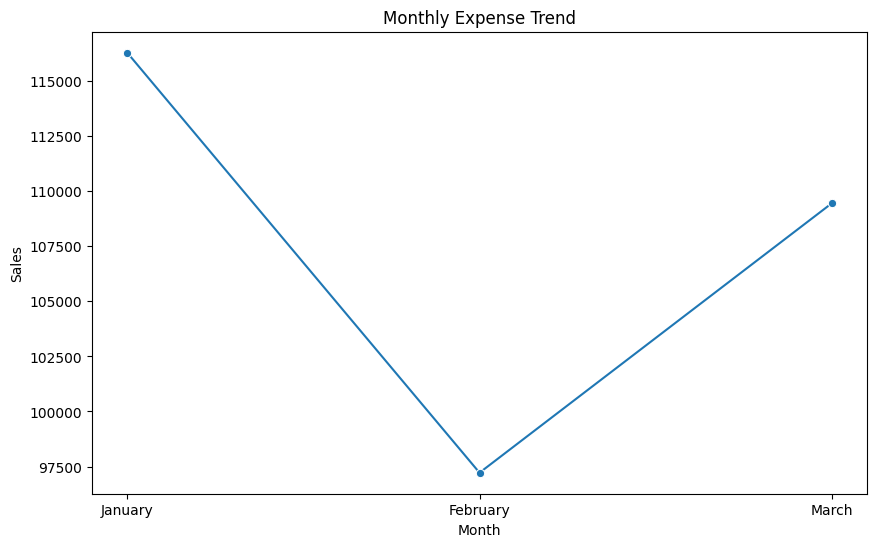

In [19]:


# Plot : Monthly Trend
monthly_trend = df.groupby(['Month_Num', 'Month'])['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trend, x='Month', y='Sales', marker='o', sort=False)
plt.title('Monthly Expense Trend')


- bar plot

/tmp/ipython-input-3370586679.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_pattern, x='Day_Name', y='Sales', palette='coolwarm')


Text(0.5, 1.0, 'Spending Pattern by Day of Week')

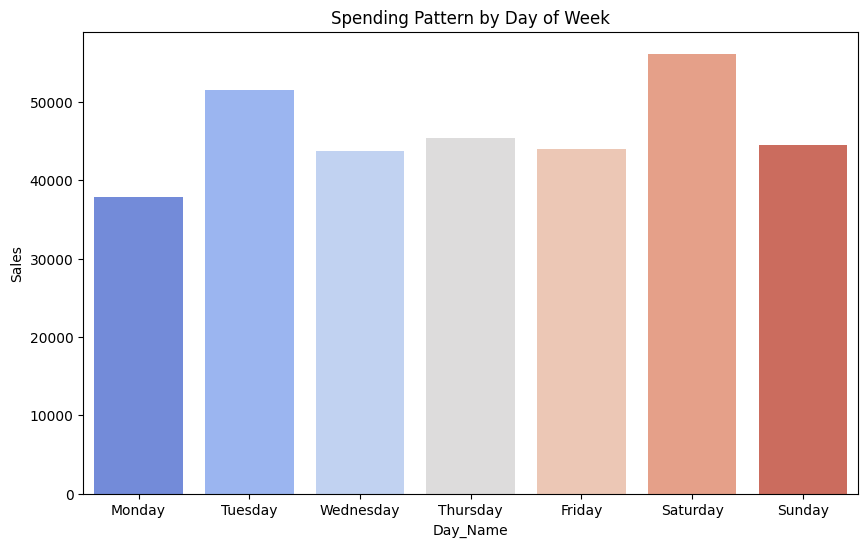

In [24]:
# Plot : Daily Pattern
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pattern = df.groupby('Day_Name')['Sales'].sum().reindex(day_order).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_pattern, x='Day_Name', y='Sales', palette='coolwarm')
plt.title('Spending Pattern by Day of Week')


- box plot

/tmp/ipython-input-3760453298.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sales', y='Product line', palette='Set2')


Text(0.5, 1.0, 'Expense Variability by Product Category')

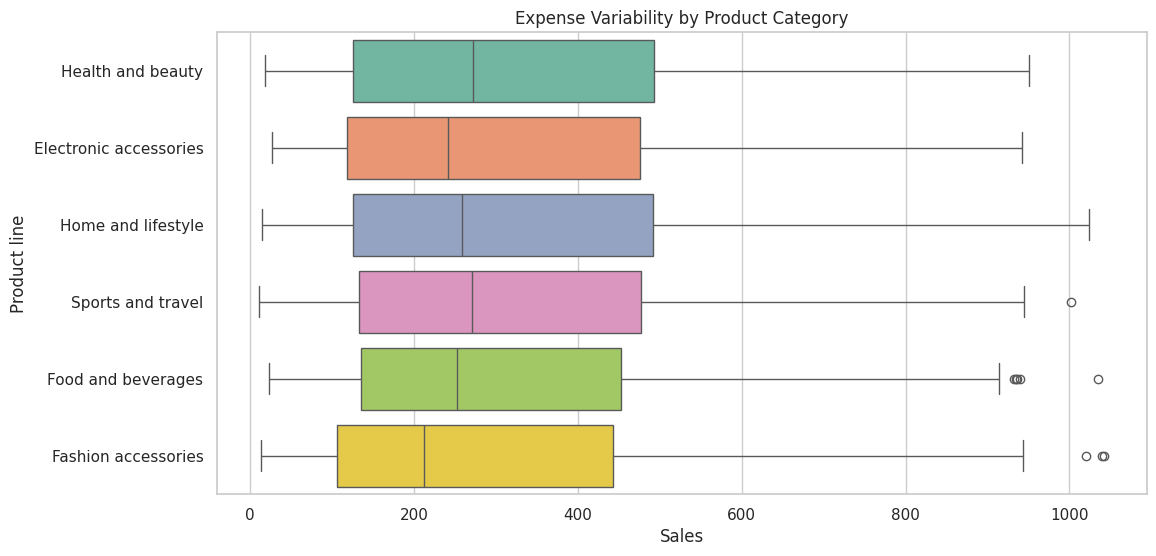

In [ ]:
# Variability and Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Sales', y='Product line', palette='Set2')
plt.title('Expense Variability by Product Category')


In [23]:

# Exporting summary for reference
df.describe().to_csv('/content/4870114-SuperMarket_Analysis (1).csv')